# Give me some credit

In [2]:
import numpy as np
import pandas as pd
import sklearn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re as re
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


%matplotlib inline

## Read in data

In [3]:
train_df = pd.read_csv('data/cs-training.csv')
test_df = pd.read_csv('data/cs-test.csv')

## Check data

In [ ]:
train_df.head(5)

In [5]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


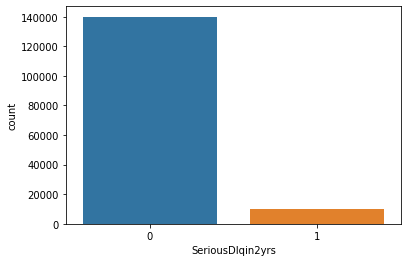

In [10]:
plt.figure()
sns.countplot('SeriousDlqin2yrs',data=train_df)

## Wash data

In [4]:
train_df.loc[train_df['age'] == 0, 'age'] = train_df['age'].median()
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].replace(np.nan,train_df['MonthlyIncome'].mean())
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(5), int64(7)
memory usage: 13.7 MB


In [5]:
test_df.loc[train_df['age'] == 0, 'age'] = test_df['age'].median()
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].replace(np.nan,test_df['MonthlyIncome'].mean())
test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].median(), inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null float64
dtypes: float64(6), int64(6)
memory usage: 9.3 MB


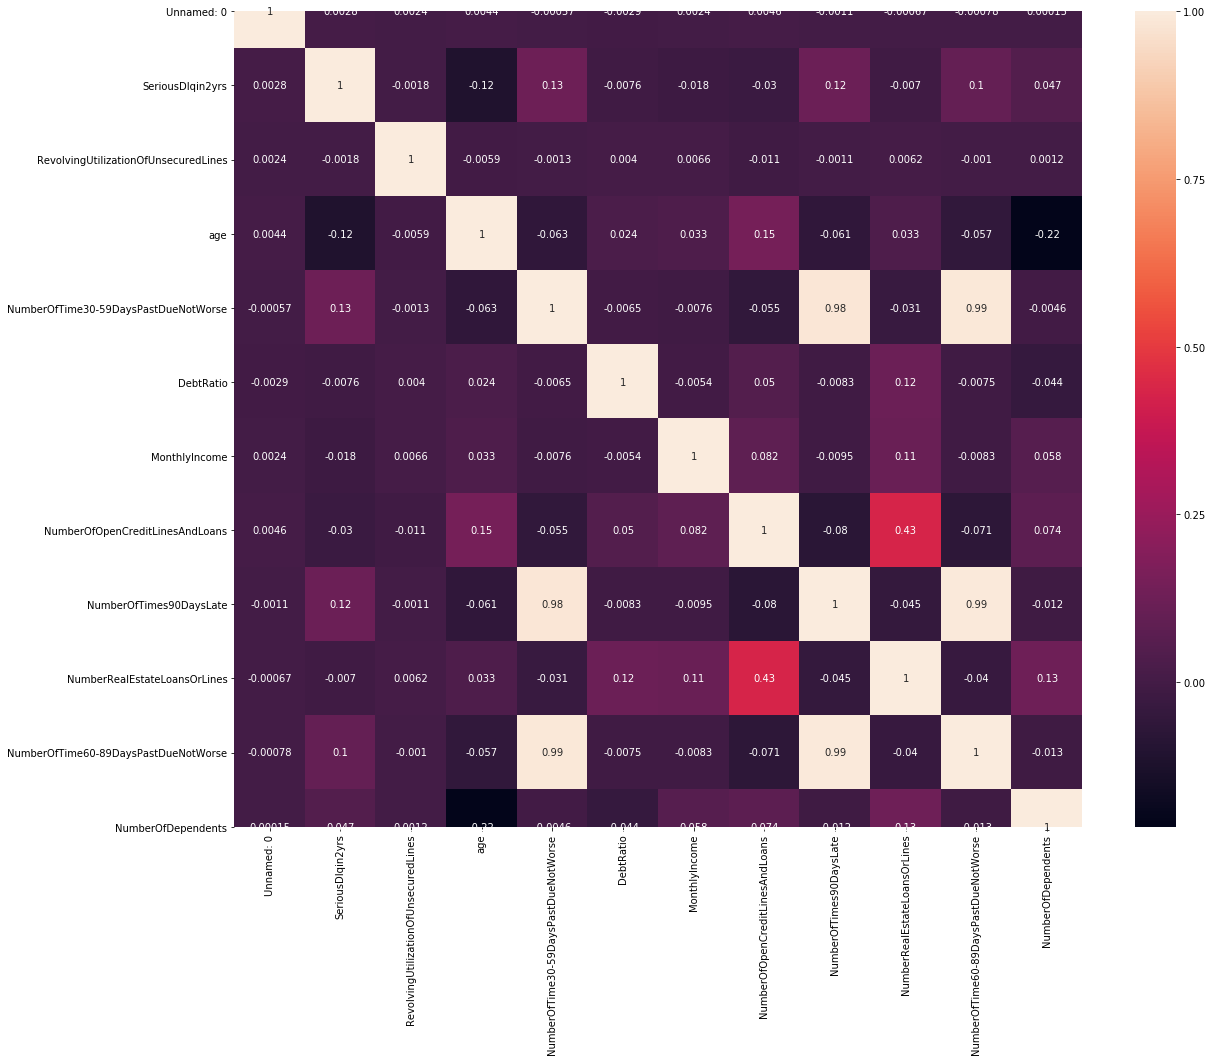

In [5]:
# check correlation
corr = train_df.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr, annot=True, fmt='.2g')

## Data analysis

In [6]:
# rename
X = train_df.drop(['SeriousDlqin2yrs'],axis=1)
y = train_df['SeriousDlqin2yrs']
W = test_df.drop(['SeriousDlqin2yrs'],axis=1)
z = test_df['SeriousDlqin2yrs']

In [7]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

In [8]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

### Linear Regression

AUC Score :  0.7906724549643863


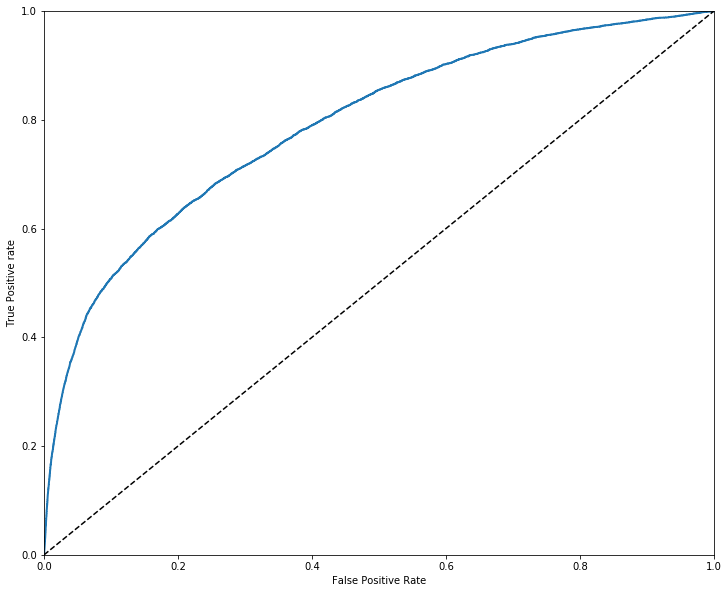

In [11]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=111)

lr = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

lr_scores_proba = lr.predict_proba(X_train_scaled)

lr_scores = lr_scores_proba[:,1]

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_train, lr_scores)

plot_roc_curve(fpr_lr, tpr_lr)
print ('AUC Score : ', (roc_auc_score(y_train, lr_scores)))

### Random Forest Classifier

Original dataset shape : Counter({0: 139974, 1: 10026})
Resampled dataset shape: Counter({0: 10026, 1: 10026})
AUC score: 0.8661061176265682


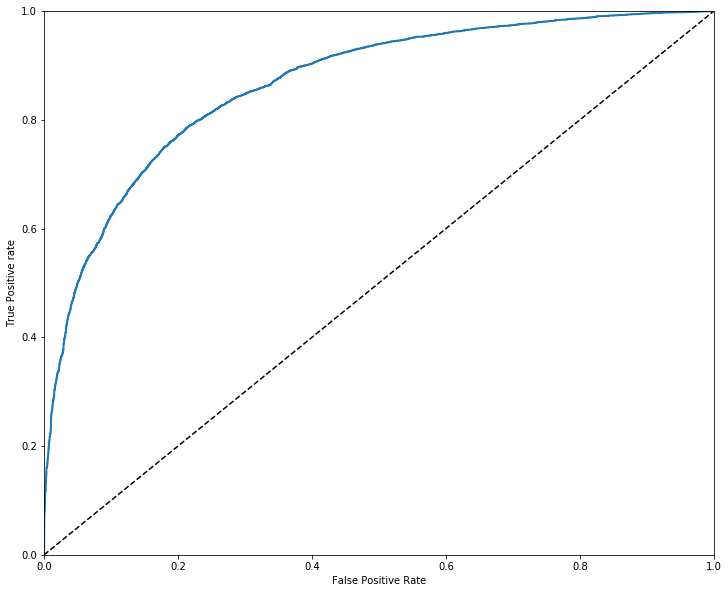

In [12]:
print ('Original dataset shape :', Counter(y))
rus = RandomUnderSampler(random_state=111)
X_resampled, y_resampled = rus.fit_sample(X, y)
print ('Resampled dataset shape:', Counter(y_resampled))
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, random_state=111)


forest = RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest.fit(X_train_rus, y_train_rus)
y_scores_prob = forest.predict_proba(X_train_rus)
y_scores = y_scores_prob[:, 1]
fpr, tpr, thresh = roc_curve(y_train_rus, y_scores)
plot_roc_curve(fpr, tpr)
print ('AUC score:', roc_auc_score(y_train_rus, y_scores))

AUC Score: 0.8542386671561242


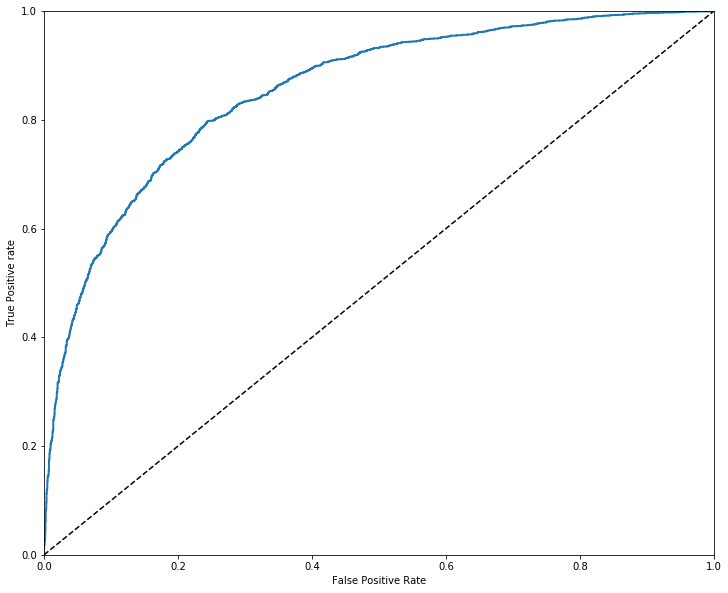

In [10]:
y_test_proba = forest.predict_proba(X_test_rus)
y_scores_test = y_test_proba[:, 1]
fpr_test, tpr_test, thresh_test = roc_curve(y_test_rus, y_scores_test)
plot_roc_curve(fpr_test, tpr_test)
print ('AUC Score:', roc_auc_score(y_test_rus, y_scores_test))

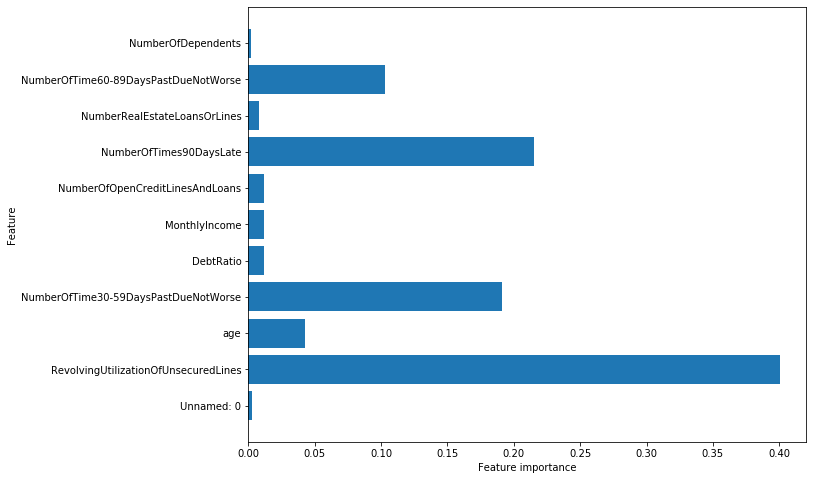

In [13]:
plot_feature_importances(forest)

### GBC

AUC Score: 0.9306376706417555


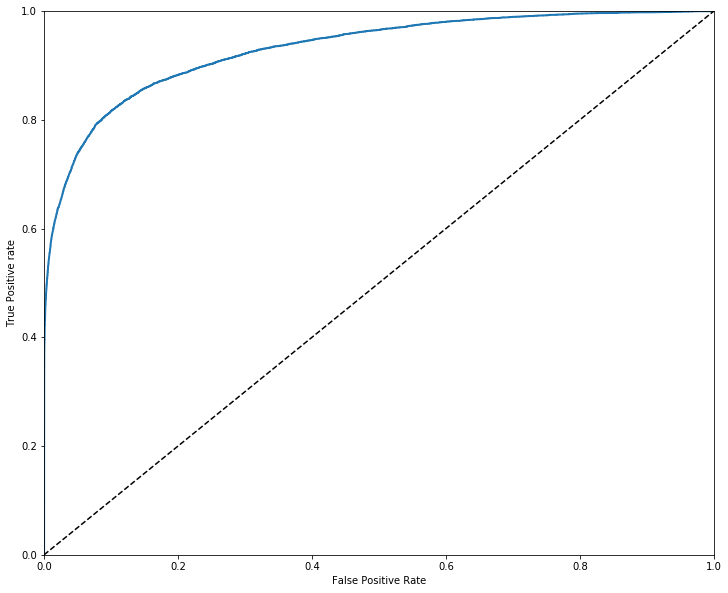

In [14]:
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=112)
gbc_clf.fit(X_train, y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:, 1]
fpr_gbc, tpr_gbc, thres_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print ('AUC Score:', roc_auc_score(y_train, gbc_clf_scores))

In [15]:
gbc_val_proba = gbc_clf.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:, 1]
print ('AUC score:', roc_auc_score(y_test, gbc_val_scores))

AUC score: 0.8589734955914544


AUC Score : 0.8749548909396745
AUC Score : 0.8615124727945405


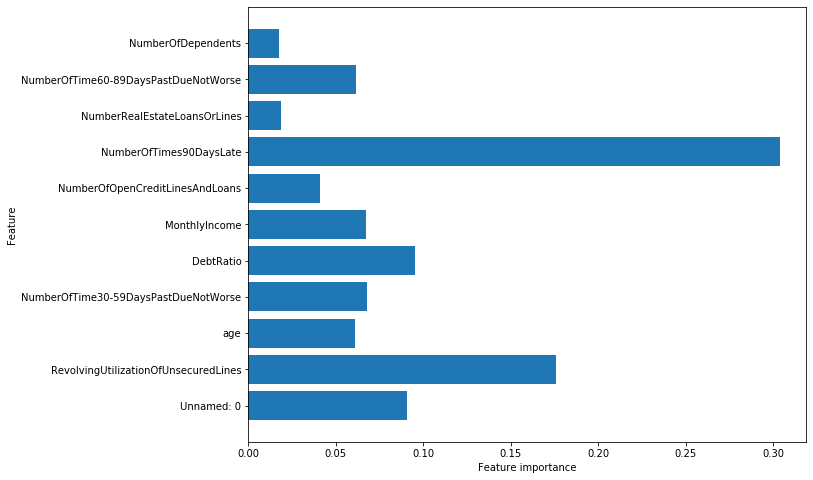

In [16]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print ('AUC Score :', roc_auc_score(y_train, gbc_clf_scores))
print ('AUC Score :', roc_auc_score(y_test, gbc_val_scores))
plot_feature_importances(gbc_clf)

## Data Output

In [23]:
temp = W.replace([np.inf, -np.inf], np.nan, inplace=False)
temp.isna().sum()
scaler.transform(W)

array([[-1.73263351, -0.02222437, -0.63178224, ..., -0.89609182,
        -0.05857521, -0.66522589],
       [-1.73261041, -0.024219  ,  0.31552844, ...,  2.6249284 ,
        -0.05857521,  1.14112239],
       [-1.73258731, -0.02620322,  0.45085853, ..., -0.01583677,
        -0.05857521,  1.14112239],
       ...,
       [ 0.61163846, -0.02602218,  1.19517407, ..., -0.89609182,
        -0.05857521, -0.66522589],
       [ 0.61166156, -0.02482292,  0.24786339, ...,  0.86441829,
         0.17736147,  2.04429653],
       [ 0.61168465, -0.02432035, -1.57909292, ..., -0.89609182,
        -0.05857521, -0.66522589]])

In [19]:
submission_proba = gbc_clf_submission.predict_proba(W)
submission_scores = submission_proba[:, 1]
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission.csv', index=False)

NameError: name 'gbc_clf_submission' is not defined

AUC Score: 0.8688733432190885


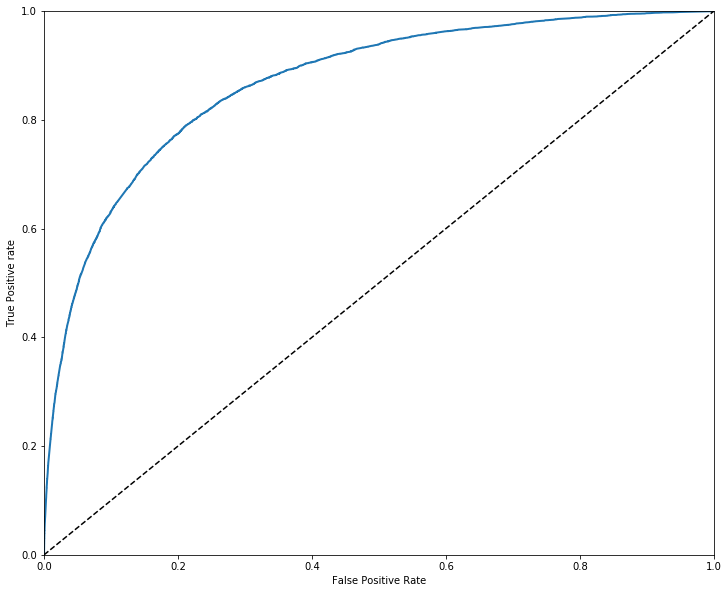

In [34]:
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=4, random_state=0)
gbc_clf = sklearn.ensemble.AdaBoostClassifier(base_estimator=base_estimator, n_estimators=32,
                         random_state=0, learning_rate=0.1)
gbc_clf.fit(X_train, y_train)
gbc_clf_scores = gbc_clf.predict_proba(X_train)[:, 1]
fpr_gbc, tpr_gbc, thres_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print ('AUC Score:', roc_auc_score(y_train, gbc_clf_scores))

In [35]:
gbc_val_proba = gbc_clf.predict_proba(X_test)
gbc_val_scores = gbc_val_proba[:, 1]
print ('AUC score:', roc_auc_score(y_test, gbc_val_scores))

AUC score: 0.8579718809506112


In [36]:
submission_proba = gbc_clf.predict_proba(W)
submission_scores = submission_proba[:, 1]
ids = np.arange(1, 101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission.csv', index=False)

In [37]:
from sklearn_porter import Porter

porter = Porter(gbc_clf, language='js')
output = porter.export(embed_data=True)

print(output)

var AdaBoostClassifier = function() {

    var findMax = function(nums) {
        var index = 0;
        for (var i = 0; i < nums.length; i++) {
            index = nums[i] > nums[index] ? i : index;
        }
        return index;
    };

    var forest = new Array();

    forest.push(function(features) {
        var classes = new Array(2);
        if (features[7] <= 0.5) {
            if (features[1] <= 0.5484386682510376) {
                if (features[3] <= 0.5) {
                    if (features[9] <= 0.5) {
                        classes[0] = 0.6344799999993429; 
                        classes[1] = 0.010168888888888759; 
                    } else {
                        classes[0] = 0.008000000000000052; 
                        classes[1] = 0.0010488888888888891; 
                    }
                } else {
                    if (features[9] <= 0.5) {
                        classes[0] = 0.06561777777778639; 
                        classes[1] = 0.0051733333333333666; 
